In [1]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
   "livereveal", {
       'width': 1200,
       'height': 700,
       "scroll": True,
})

{'width': 1200, 'height': 700, 'scroll': True}

# Lecture 15

### The Normal Curve

How far are you on the project? 


A. I clicked the link.  
B. I clicked the link and read some of the instructions.  
C. I clicked the link and read some of the instructions and started problem 1.1.  
D. I clicked the link and read some of the instructions and finished problem 1.1.  
E. None of the above.

## Center and Spread

We saw two ways of measuring center:
1. Mean (balance point of histogram)
2. Median (halfway point of area of histogram)

And two ways of measuring spread:
1. Range (horizontal width of histogram)
2. Standard Deviation (meaning on histogram - to be determined)

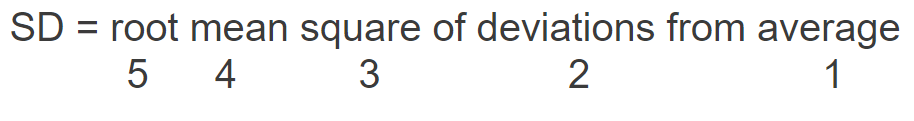

## Grouped Mean and Standard Deviation

In [3]:
values = make_array(2, 4, 10)
counts = make_array(1, 2, 1)

This represents the data set 2, 4, 4, 10.

In [5]:
mean = np.sum(values*counts)/np.sum(counts)
mean

5.0

In [6]:
squared_deviations = (values - mean)**2
squared_deviations

array([ 9.,  1., 25.])

The squared deviations are 9, 1, 1, 25. Variance is mean squared deviation, and SD is just the square root of that.

In [7]:
variance = np.sum(squared_deviations*counts)/np.sum(counts)
sd = variance**0.5
sd

3.0

Check using `np.std`.

In [8]:
np.std(make_array(2, 4, 4, 10))

3.0

## Discussion Question

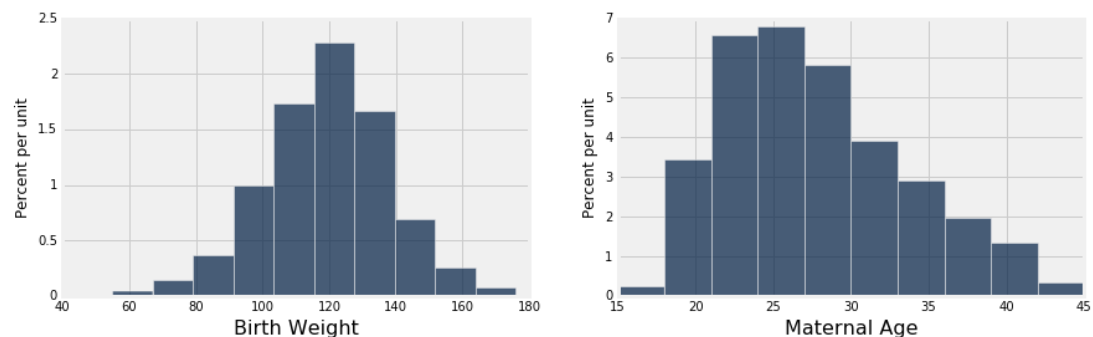

Which has greater standard deviation?  
A. Birth Weight in Pounds (not pictured)  
B. Maternal Age (right)  
C. Impossible to tell from histogram

In [9]:
births = Table.read_table('baby.csv')
np.std(births.column('Birth Weight'))

18.32086370220278

In [10]:
np.std(births.column('Maternal Age'))

5.815360404190897

## Main reason to use standard deviation

No matter what the shape of the distribution, the bulk of the data are in the range “average ± a few SDs”

In [11]:
nba13 = Table.read_table('nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


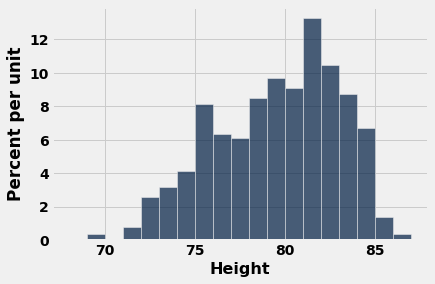

In [12]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

In [13]:
mean_height = np.mean(nba13.column('Height'))
sd_height = np.std(nba13.column('Height'))
(mean_height, sd_height)

(79.06534653465347, 3.4505971830275546)

## Tallest and Shortest Players

In [14]:
# tallest person
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Tyson Chandler,Center,85,235,30


In [15]:
#shortest player
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [16]:
# How many inches above the mean, for the tallest player?
87 - mean_height

7.934653465346528

In [17]:
# How many SDs above the mean, for the tallest player?
(87 - mean_height)/sd_height

2.2995015194397923

In [18]:
# How many SDs below the mean, for the shortest player?
(69 - mean_height)/sd_height

-2.9169868288775844

## Standard Units

Rather than measuring our data in original units, we can measure in **standard units, z,** which expresses each data value relative to the mean and standard deviation of the dataset.

$$ z~~=~~\frac{\text{data value} - \text{mean}}{\text{standard deviation}}$$

* Standard units measure "number of SDs above average."
    - negative for data values below average
    - positive for data values above average
* Most of the values are small
    * the bulk of the data are in the range “average ± a few SDs”

In [19]:
#conversion to standard units

def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

In [21]:
nba13 = nba13.with_column(
    'Height (Standard Units)', standard_units(nba13.column('Height'))
)
nba13.sort('Height (Standard Units)', True)

Name,Position,Height,Weight,Age in 2013,Height (Standard Units)
Hasheem Thabeet,Center,87,263,26,2.2995
Roy Hibbert,Center,86,278,26,2.0097
Tyson Chandler,Center,85,235,30,1.71989
Spencer Hawes,Center,85,245,25,1.71989
Marc Gasol,Center,85,265,28,1.71989
Timofey Mozgov,Center,85,250,27,1.71989
Meyers Leonard,Center,85,250,21,1.71989
Rudy Gobert,Center,85,235,21,1.71989
Alex Len,Center,85,255,20,1.71989
Colton Iverson,Center,84,255,24,1.43009


## Chebyshev’s Inequality

A precise statement of what we said earlier:   
No matter what the shape of the distribution, the bulk of the data are in the range “average ± a few SDs”

No matter what the shape of the distribution, the proportion of values in the range “average ± z SDs” is at least 

$$1 - \frac{1}{z^2}$$

## Chebyshev's Bounds

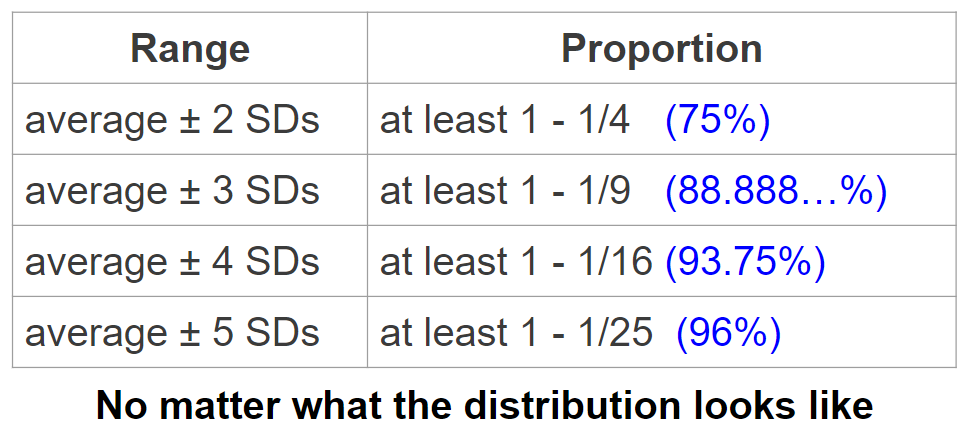

In [22]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [23]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


It is **possible** for data values to be many SDs above or below the mean (say, 14 standard units), but it is **rare**.

In [24]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

In [26]:
1-1/(14**2)

0.9948979591836735

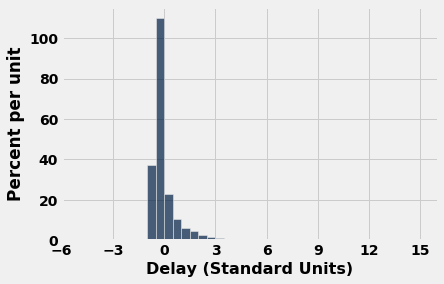

In [25]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plt.xticks(np.arange(-6, 17, 3));

## Standard Deviation on a Histogram

It's not usually easy to determine SD by looking at a histogram. But when the histogram is bell-shaped, the SD is *the distance between the mean and the points of inflection on either side.*

In [27]:
#: data set of height/weight of 5000 adult males
height_and_weight = Table.read_table('height_and_weight.csv')
height_and_weight

Height,Weight
73.847,241.894
68.7819,162.31
74.1101,212.741
71.731,220.042
69.8818,206.35
67.253,152.212
68.7851,183.928
68.3485,167.971
67.0189,175.929
63.4565,156.4


## Distribution of heights

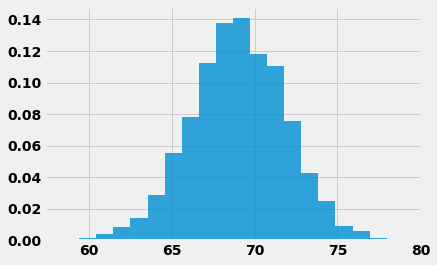

In [28]:
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.column('Height'), **defaults);

What is the approximate SD of height?  
    A.  3 inches  
    B.  6 inches  
    C.  18 inches  
    D.  68 inches  

In [29]:
np.std(height_and_weight.column('Height'))

2.863075878119538

## Distribution of weights

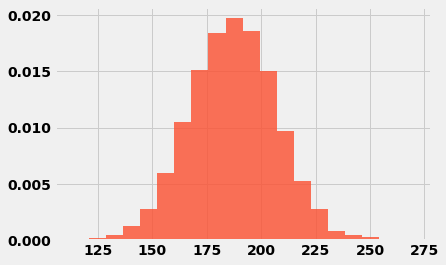

In [30]:
#: weight histogram
plt.hist(height_and_weight.column('Weight'), color='C1', **defaults);

What is the approximate SD of weight?  
A.  10 pounds  
B.  20 pounds  
C.  40 pounds  
D.  80 pounds  

In [31]:
np.std(height_and_weight.column('Weight'))

19.779176302396458

## A familiar shape

- We've seen this bell-like shape frequently.
- These bells are different in two key aspects: center and spread.

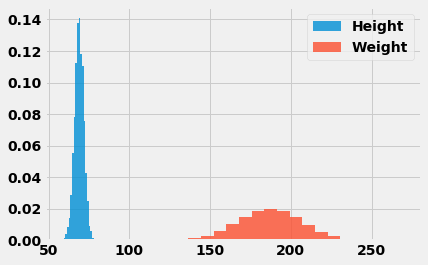

In [32]:
#: draw histograms on same scale
defaults = dict(bins=20, linewidth=0, density=True, alpha=.8)
plt.hist(height_and_weight.column('Height'), label='Height', **defaults);
plt.hist(height_and_weight.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Centering

- Subtracting the mean centers distribution

In [33]:
#: compute mean height
mean_height = height_and_weight.column('Height').mean()
mean_height

69.02634590621741

In [34]:
#: compute mean weight
mean_weight = height_and_weight.column('Weight').mean()
mean_weight

187.0206206581932

In [35]:
centered_height_and_weight = height_and_weight.with_columns(
    'Height', height_and_weight.column('Height') - mean_height,
    'Weight', height_and_weight.column('Weight') - mean_weight,
)

## Centering

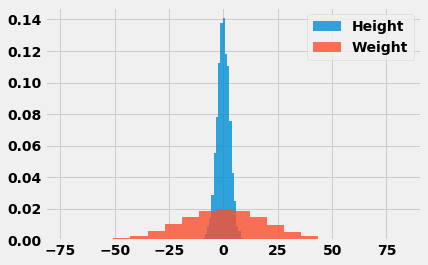

In [36]:
#: plot centered distributions
plt.hist(centered_height_and_weight.column('Height'), label='Height', **defaults);
plt.hist(centered_height_and_weight.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

## Scaling

- Want distributions to have the same width.
- So we divide by standard deviation.
- Data that is centered and scaled is *standardized*.

In [37]:
height_sd = np.std(height_and_weight.column('Height'))
height_sd

2.863075878119538

In [38]:
weight_sd = np.std(height_and_weight.column('Weight'))
weight_sd

19.779176302396458

In [39]:
standardized = centered_height_and_weight.with_columns(
    'Height', centered_height_and_weight.column('Height') / height_sd,
    'Weight', centered_height_and_weight.column('Weight') / weight_sd
)

## Standardized Histograms

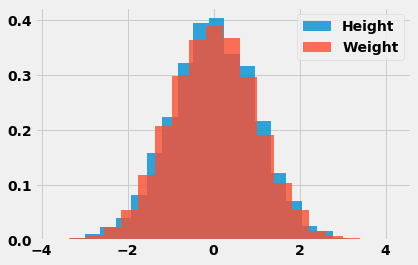

In [40]:
plt.hist(standardized.column('Height'), label='Height', **defaults);
plt.hist(standardized.column('Weight'), label='Weight', **defaults);
plt.legend(loc='upper right')

In standard units, **all** bell-shaped curves look the same.
    - mean of 0
    - SD of 1

## The (standard) normal curve

- The bell curves we've seen look essentially the same once standardized.
- This shape is called the **standard normal curve**.

$$
\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}
$$


## The standard normal curve

In [42]:
# define normal_curve using numpy
def normal_curve(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)

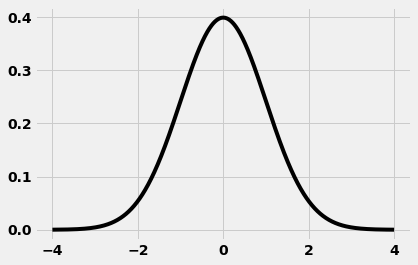

In [43]:
#: plot the curve
x = np.linspace(-4, 4, 1000)
y = normal_curve(x)

plt.plot(x, y, color='black')

## Heights/weights are approximately normal

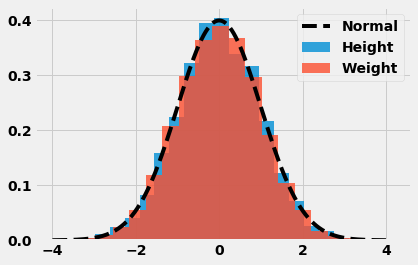

In [44]:
#: plot against normal curve
plt.hist(standardized.column('Height'), label='Height', **defaults);
plt.hist(standardized.column('Weight'), label='Weight', **defaults);
plt.plot(x, y, color='black', linestyle='--', label='Normal')
plt.legend(loc='upper right')

## The normal distribution

- We think of normal curve as a "continuous histogram"
    - a.k.a., probability density
- Mean and median are zero.
- Like a histogram:
    - total area is 1
    - area between $a$ and $b$ is probability of observing value between $a$ and $b$

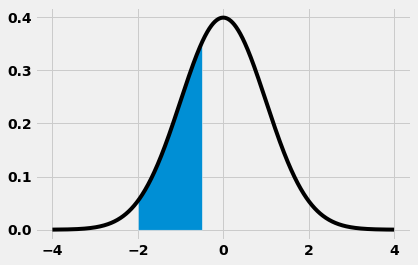

In [45]:
#: plot the area under the curve
[a, b] = [-2, -.5]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## Calculating area under the curve

- `stats.norm.cdf(z)`: area under curve from $-\infty$ to $z$

Uses a Python module for statistics:   
`from scipy import stats`

## Discussion question

What will `stats.norm.cdf(0)` evaluate to?

- A) $0$
- B) $0.4$
- C) $0.5$
- D) $1$


## Answer

In [46]:
#: calculate area between -infinity and 0
from scipy import stats
stats.norm.cdf(0)

0.5

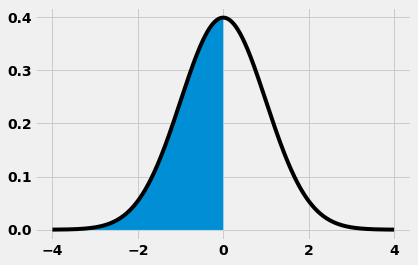

In [47]:
#: plot the area under the curve
[a, b] = [-np.inf, 0]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

## Example: area between [-1, 0]

- Strategy: 
$$(\text{area from $-\infty$ to $0$}) - (\text{area from -$\infty$ to $-1$})$$

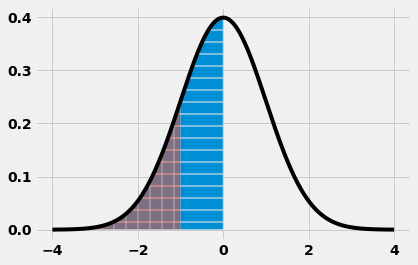

In [48]:
#: plot the area under the curve
[a, b] = [-1, 0]
ix = (x <= b)
ix_out = (x <= a)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix], hatch='-')
plt.fill_between(x[ix_out], y[ix_out], hatch='|', alpha=.5)

## In general...

- Area within $[a,b]$ is ``stats.norm.cdf(b) - stats.norm.cdf(a)``

## Within 1 SD of the mean

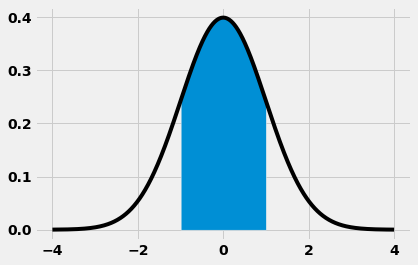

In [49]:
#: plot the area under the curve
[a, b] = [-1, 1]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

In [50]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

In [51]:
height_and_weight.where(
    'Height', are.not_below(mean_height - 1*height_sd)
).where(
    'Height', are.not_above(mean_height + 1*height_sd)
).num_rows/height_and_weight.num_rows

0.6894

In [52]:
height_and_weight.where(
    'Weight', are.not_below(mean_weight - 1*weight_sd)
).where(
    'Weight', are.not_above(mean_weight + 1*weight_sd)
).num_rows/height_and_weight.num_rows

0.6872

## Within 2 SDs of the mean

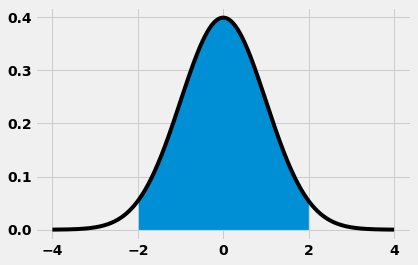

In [53]:
#: plot the area under the curve
[a, b] = [-2, 2]
ix = (x >= a) & (x <= b)
plt.plot(x, y, color='black')
plt.fill_between(x[ix], y[ix])

In [54]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [55]:
height_and_weight.where(
    'Height', are.not_below(mean_height - 2*height_sd)
).where(
    'Height', are.not_above(mean_height + 2*height_sd)
).num_rows/height_and_weight.num_rows

0.954

In [56]:
height_and_weight.where(
    'Weight', are.not_below(mean_weight - 2*weight_sd)
).where(
    'Weight', are.not_above(mean_weight + 2*weight_sd)
).num_rows/height_and_weight.num_rows

0.9532

## Normal Approximations

* Chebyshev's Inequality says that at least 1-1/4 = 75% of the data is within 2 SDs of the mean. 
* When the data is bell-shaped (normally distributed), actually very close to 95% of the data falls within 2 SDs of the mean.

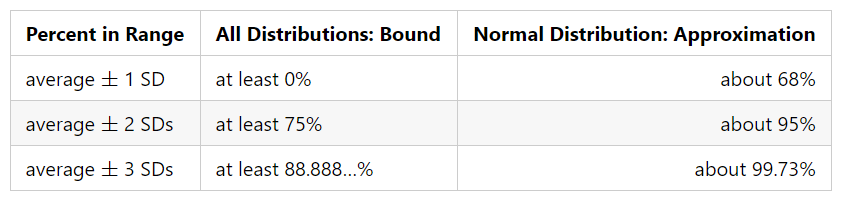

## What percentage of men weigh between 200 and 225 pounds?
* Area of histogram in [200, 225]
* Standardize, then use standard normal curve

In [57]:
left = (200 - mean_weight) / weight_sd
left

0.656214351061435

- Interpretation: 200 pounds is 0.66 SDs above the mean
- 200 pounds equals 0.66 standard units

In [58]:
right = (225 - mean_weight) / weight_sd
right

1.9201699181580782

In [59]:
#:: area in standard normal curve
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

0.22842488819306406

Approx. 22.8% of weights are between 200 and 225 pounds, inclusive.

## Standard units and area

- Define $z(x) = \dfrac{x - \text{mean}}{\text{SD}}$.
- $z(x)$ maps $x$ to standard units.
- Suppose a distribution is (roughly) normal. These are approx. equal:
    - Area between $a$ and $b$ in histogram.
    - Area between $z(a)$ and $z(b)$ in standard normal curve.

## Checking the approximation

In [60]:
#:
height_and_weight.where(
    'Weight', 
    are.between_or_equal_to(200, 225)
).num_rows / height_and_weight.num_rows

0.2294

In [61]:
#: approximation from using CDF
approximation

0.22842488819306406

## To summarize:

- Suppose we know the following about a distribution:
    - its mean and standard deviation,
    - its shape is approximately normal
- We can use the standard normal curve to calculate proportions, without using the data itself.

# Bell Curves

## Question

Why do we see bell curves so often?

## Bell-shaped data

- We've seen certain data distributions that were bell-shaped (usually true for height and weight).
- But many more examples...

## Example: Baseball runners left on base

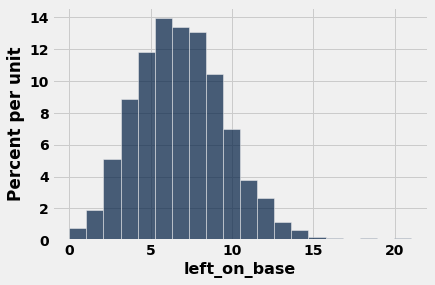

In [62]:
Table.read_table('baseball.csv').hist('left_on_base', bins=20)

## Example: Natural sleep duration

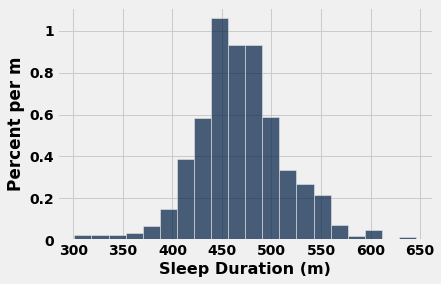

In [63]:
Table.read_table('./sleep.csv').hist(bins=20, unit='m')

## But...

- ...most data isn't bell-shaped!
- Skewed to one side, multi-modal, etc.

## Example: San Diego city salaries

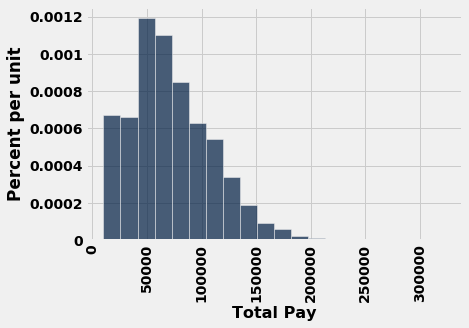

In [64]:
Table.read_table('./salaries.csv').hist('Total Pay', bins=20)

## Example: Flight delays

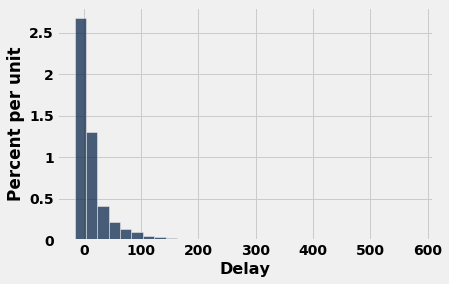

In [65]:
flights = Table.read_table('./united_summer2015.csv')
flights.hist('Delay', bins=30)

## But...

- ...even when population distribution isn't bell-shaped, empirical distribution of statistics often are.
- Example: distribution of sample mean.

## Example: Flight delays

- We want to know the average flight delay.
- We take a random sample of flights, compute sample mean.
- The sample mean could have been different!

In [66]:
#: draw 1000 sample means
n_samples = 1000

sample_means = make_array()

for i in np.arange(n_samples):
    sample = flights.sample(2000, with_replacement=True)
    sample_mean = sample.column('Delay').mean()
    sample_means = np.append(sample_means, sample_mean)

## Example: flight delays

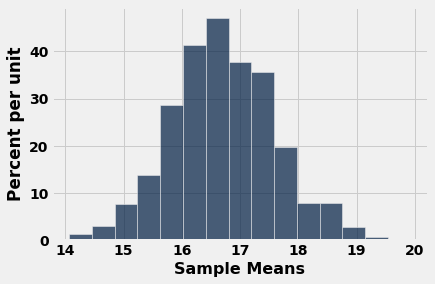

In [67]:
#: visualize
Table().with_column('Sample Means', sample_means).hist(bins=15)

## A ubiquitous phenomenon

- The population was not normal, but distribution of sample mean is.
- All of the bootstrap distributions we saw were bell-shaped.
- This appears to be a deep fact about randomness.

## The Central Limit Theorem

> The distribution of sums (and averages) of large random samples (w/ replacement) are roughly normal, regardless of the distribution of the population from which the sample was drawn.

## Example: Scratch-off lottery tickets

- Table below shows the odds of each payout of a lottery ticket

In [68]:
lottery = Table(['Prize', 'Odds']).with_rows(
[
    [0, .4],
    [1, .3],
    [5, .2],
    [20, .05],
    [50, .05]
])
lottery

Prize,Odds
0,0.4
1,0.3
5,0.2
20,0.05
50,0.05


## Example: Lottery tickets

- Each ticket costs $5; subtract from payout
- Very non-normal distribution

In [69]:
#:
payout = lottery.with_column('Gain/Loss', lottery.column('Prize') - 5)
payout

Prize,Odds,Gain/Loss
0,0.4,-5
1,0.3,-4
5,0.2,0
20,0.05,15
50,0.05,45


## Simulating one lottery ticket

- Choose a payout according to odds.
- `np.random.choice` accepts an array of probabilities.

In [72]:
# randomly choose a payout according to odds
np.random.choice(payout.column('Gain/Loss'), p=payout.column('Odds'))


-4

## Simulating 100 tickets

- How much do you win/lose after buying 100 tickets?

In [73]:
def buy_k_tickets(k):
    winnings = make_array()

    for i in np.arange(k):
        won = np.random.choice(payout.column('Gain/Loss'), p=payout.column('Odds'))
        winnings = np.append(winnings, won)
        
    return winnings

In [77]:
buy_k_tickets(100).sum()

-5.0

## Repeating the experiment

- After purchasing 100 tickets, your total winnings are a number.
- But it could have been different...
- Total winnings come from some distribution.
- We can approximate it through simulation.

In [78]:
distribution = make_array()
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(100).sum()
    distribution = np.append(distribution, winnings)

## Visualizing

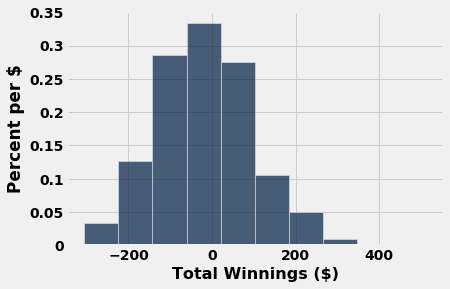

In [79]:
#: does it look normal?
Table().with_columns('Total Winnings', distribution).hist(unit='$', bins=10)

## Discussion question

How will the distribution change if the experiment were repeated, but with 400 tickets instead of 100?

- A) It will get narrower.
- B) It will get wider.
- C) It will stay the same.
- D) It will turn red.

## Answer

In [80]:
distribution_400 = make_array()
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings = buy_k_tickets(400).sum()
    distribution_400 = np.append(distribution_400, winnings)

## Answer

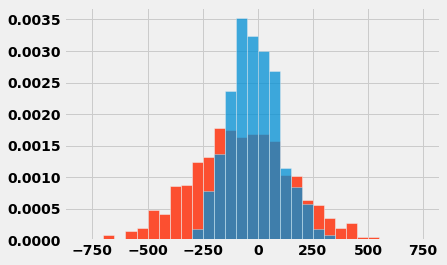

In [81]:
#: does it look normal?
bins = np.arange(-800, 800, 50)
plt.hist(distribution_400, color='C1', bins=bins, density=True, label='400');
plt.hist(distribution, bins=bins, density=True, alpha=.75, label='100');

## What if we look at average payout per ticket?

In [ ]:
distribution_100 = make_array()
distribution_400 = make_array()
n_repetitions = 1000

for i in np.arange(n_repetitions):
    winnings_100 = buy_k_tickets(100).mean()
    winnings_400 = buy_k_tickets(400).mean()
    distribution_100 = np.append(distribution_100, winnings_100)
    distribution_400 = np.append(distribution_400, winnings_400)

In [ ]:
#: does it look normal?
bins = np.arange(-5, 5, 0.5)
plt.hist(distribution_400, color='C1', bins=bins, density=True, label='400');
plt.hist(distribution_100, bins=bins, density=True, alpha=.75, label='100');

## The shape of the distribution

- CLT: Sums and averages of random samples are roughly normal.
- Centered at population mean (or sum).
- What is the spread of the distribution?
    - Changes based on sample size